# Part 1: Import Libraries
This part imports all the necessary libraries required for building and training the CNN model.

In [1]:
# Import necessary libraries
import tensorflow as tf  # TensorFlow for building and training the neural network
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras.applications import InceptionV3  # Pretrained InceptionV3 model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt  # For plotting and visualizations
import os  # For interacting with the operating system (e.g., paths)

# Part 2: Set Paths and Verify Directories
This part sets the paths to the training and testing datasets and checks if the directories exist.

In [2]:
# Set the paths to the training and testing datasets
train_dir = r'C:\Users\rakat.murshed\Documents\Datasets\intel image\seg_train\seg_train'
test_dir = r'C:\Users\rakat.murshed\Documents\Datasets\intel image\seg_test\seg_test'

# Verify if the directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory does not exist: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Testing directory does not exist: {test_dir}")

# Part 3: Data Augmentation and Loading Data
This part configures data augmentation for both the training and testing datasets and then loads the data.

In [3]:
# Data Augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values from [0, 255] to [0, 1]
    shear_range=0.2,  # Randomly apply shearing
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True  # Randomly flip images horizontally
)

# Data Augmentation for the testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
training_set = train_datagen.flow_from_directory(
    train_dir,  # Path to training data
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,  # Number of images to return in each batch
    class_mode='categorical'  # For multi-class classification
)

# Load testing data
test_set = test_datagen.flow_from_directory(
    test_dir,  # Path to testing data
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,  # Number of images to return in each batch
    class_mode='categorical'  # For multi-class classification
)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Part 4: Define the CNN Model
This part defines the Convolutional Neural Network (CNN) model architecture.

In [4]:
# Load the InceptionV3 model, excluding the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer with 1024 units and ReLU activation
predictions = Dense(6, activation='softmax')(x)  # Final layer with 6 classes and softmax activation

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (InceptionV3) so they don't get updated during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Part 5: Train the Model
This part handles the model training process with appropriate error handling.

In [6]:
# Calculate steps per epoch
steps_per_epoch = training_set.samples // training_set.batch_size
validation_steps = test_set.samples // test_set.batch_size

# Train the model with appropriate steps per epoch
history = model.fit(
    training_set,
    steps_per_epoch=steps_per_epoch,
    epochs=10,  # Number of epochs to train the model
    validation_data=test_set,
    validation_steps=validation_steps  # Use calculated steps for validation
)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 379s 862ms/step - accuracy: 0.8865 - loss: 0.3213 - val_accuracy: 0.8834 - val_loss: 0.3105
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.7831 - val_accuracy: 0.9167 - val_loss: 0.2296
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 377s 857ms/step - accuracy: 0.8891 - loss: 0.2853 - val_accuracy: 0.8911 - val_loss: 0.2826
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8750 - loss: 0.2107 - val_accuracy: 0.8333 - val_loss: 0.3851
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 379s 862ms/step - accuracy: 0.8960 - loss: 0.2698 - val_accuracy: 0.8908 - val_loss: 0.3103
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.3237 - val_accuracy: 0.9167 - val_loss: 0.3130
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 384s 873ms/step - accuracy: 0.9030 - loss: 0.2615 - val_accuracy: 0.8931 - val_loss: 0.2873
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8125 - loss: 0.4545 - 

# Part 6: Evaluate and Visualize the Model Performance
This part evaluates the model on the test set and visualizes the training and validation accuracy and loss.

94/94 ━━━━━━━━━━━━━━━━━━━━ 57s 606ms/step - accuracy: 0.8753 - loss: 0.3236
Test Accuracy: 88.20%


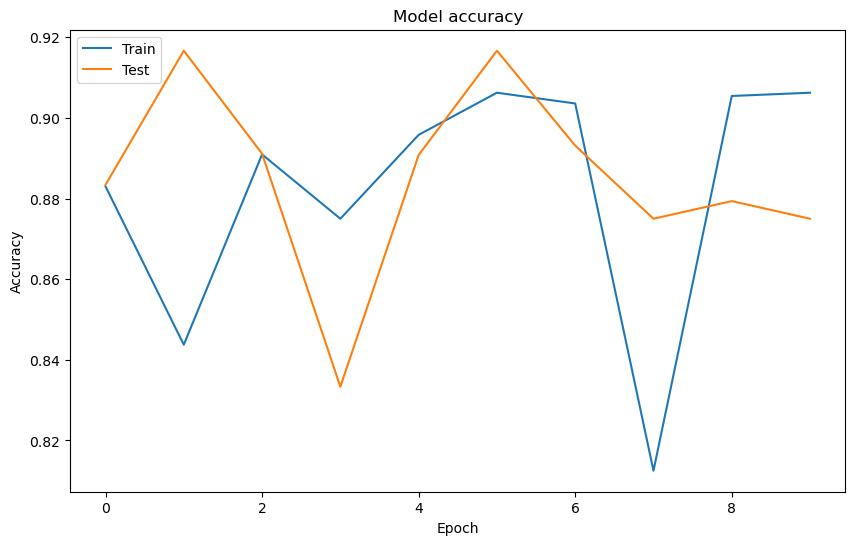

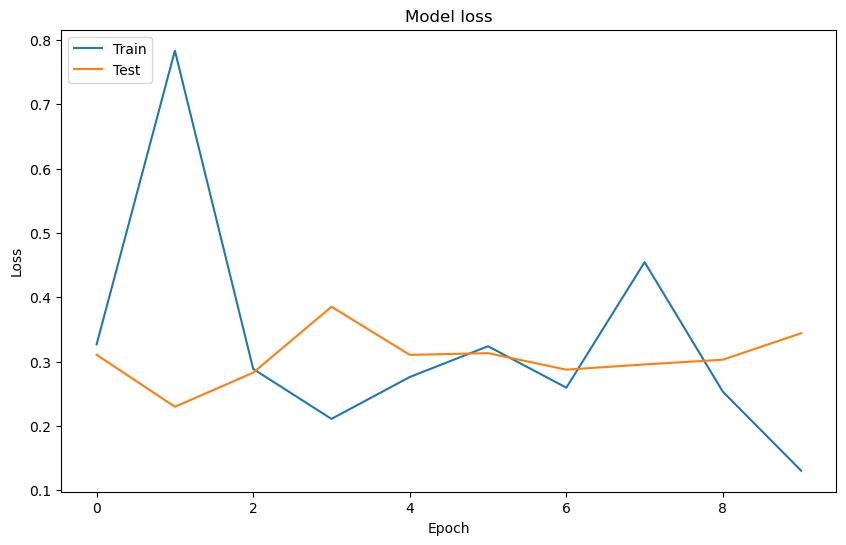

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()